In [1]:
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
import pickle

%matplotlib inline
# plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams.update({'font.size': 18})

In [2]:
# plt.rcParams['ps.useafm'] = True
# plt.rcParams['pdf.use14corefonts'] = True
# plt.rcParams['text.usetex'] = True
# plt.rcParams['pdf.fonttype'] = 42
# plt.rcParams['ps.fonttype'] = 42

In [2]:
with open('simple_ext_50+10+1000.pkl', 'rb') as fb:
    results_load = pickle.load(fb)

In [3]:
results = [(1-x) for x in results_load]

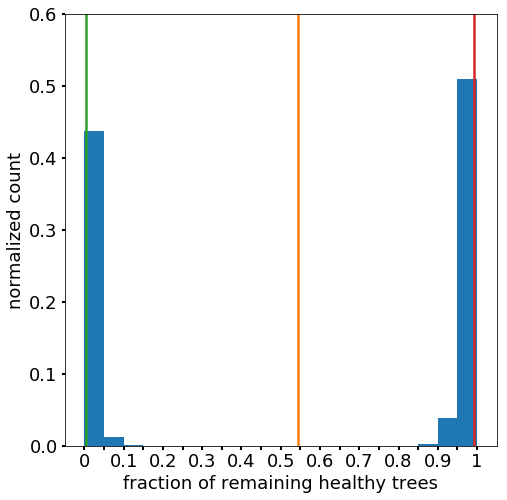

In [21]:
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
ax = fig.add_subplot(111)
weights = np.ones_like(results)/float(len(results))
splits, _, _ = plt.hist(results, bins=np.arange(0,1+0.05,0.05), normed=False, weights=weights, color='C0', alpha=1)
plt.axvline(np.amin(results),color="C2",label="%0.2f%%" % (np.amin(results)*100),linewidth=2.5)
plt.axvline(np.mean(results),color="C1",label="mean = %0.2f%%" %(np.mean(results)*100),linewidth=2.5)
plt.axvline(np.amax(results),color="C3",label="max = %0.2f%%" %(np.amax(results)*100),linewidth=2.5)

plt.ylim([0,0.6])
plt.xticks(np.arange(0,1+0.05,0.05))
plt.xlabel('fraction of remaining healthy trees')
plt.ylabel('normalized count')

ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
for idx,label in enumerate(ax.xaxis.get_ticklabels()):
    if idx % 2 != 0:
        label.set_visible(False)
# for idx,label in enumerate(ax.xaxis.get_major_ticks()):
#      if idx % 2 != 0:
#         label.set_visible(False)
# plt.legend(loc=1)

# plt.savefig('sample_results_net.pdf', dpi=300, bbox_inches='tight')

In [4]:
win_results = [x for x in results if x >= np.mean(results)]
print('fraction of wins: %0.2f' % (100.0*len(win_results)/len(results)))
print('win mean: %0.2f' %(np.mean(win_results)*100))

fraction of wins: 55.00
win mean: 97.25


In [ ]:
fig = plt.figure()
fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
ax = fig.add_subplot(111, aspect='equal')

plt.boxplot(results, showmeans=True, meanline=True)